In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time as timepk
import os

import Bell_EBM as ebm

In [2]:
savepathroot = 'saves/'

In [3]:
# Eccentric Rocky, Pseudo-synchronously rotating
name = 'eccentric_rocky'
planet = ebm.Planet('rock', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
star = ebm.Star()
system = ebm.System(star, planet)
system.planet.update()

# Eccentric Rocky, Pseudo-synchronously rotating
name2 = 'eccentric_rocky_3v2'
planet2 = ebm.Planet('rock', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
star2 = ebm.Star()
system2 = ebm.System(star2, planet2)
system2.planet.Prot_input = system2.planet.Porb*2/3
system2.planet.Prot = system2.planet.Porb*2/3
system2.planet.update()
        
if os.path.isdir(savepathroot+name+'/'):
    print('Warning: This directory already exists and its files will be overwritten if you continue!')
    print('Resuming in 5 seconds')
    timepk.sleep(5)
else:
    os.mkdir(savepathroot+name+'/')

# Run initial burn-in
T0 = (np.median(system.Finc(np.linspace(0,system.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)
# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb*20
dt = system.planet.Porb/100
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)
# Get the final orbit for plotting
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb
dt = system.planet.Porb/1000
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)


# Run initial burn-in
T0 = (np.median(system2.Finc(np.linspace(0,system2.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
t0 = 0
t1 = system2.planet.Porb*20
dt = system2.planet.Porb/10
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)
# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps2[-1]
t0 = times2[-1]
t1 = t0+system2.planet.Porb*20
dt = system2.planet.Porb/100
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)
# Get the final orbit for plotting
T0 = maps2[-1]
t0 = times2[-1]
t1 = t0+system2.planet.Porb
dt = system2.planet.Porb/1000
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)

Resuming in 5 seconds


/home/taylor/Documents/Research/Modelling/oxford/Bell_EBM/Planet.py:150: RuntimeWarning: divide by zero encountered in true_divide
  return a/np.expm1(b/T)


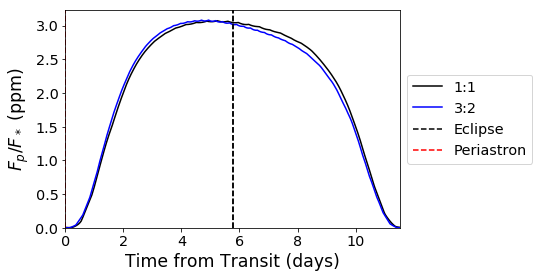

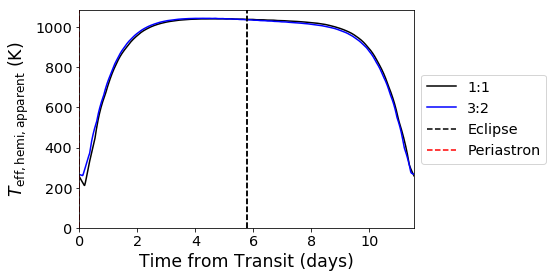

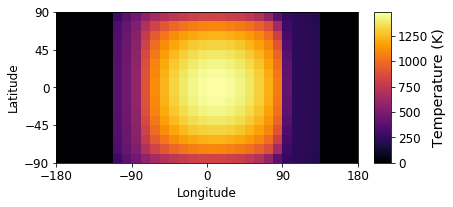

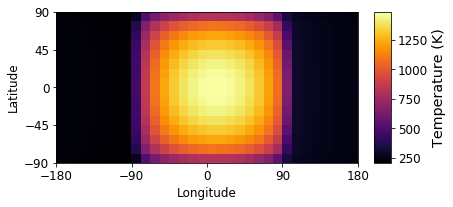

In [4]:
# Plot the lightcurves
fig = system.plot_lightcurve(times, maps, bolo=False)
fig = system2.plot_lightcurve(times2, maps2, bolo=False)
ax = plt.gca()
ax.lines[0].set_color('k')
ax.lines[0].set_label('1:1')
ax.lines[3].set_color('b')
ax.lines[3].set_label('3:2')
handles, labels = np.array(ax.get_legend_handles_labels())
ax.legend(handles[np.array([0,3,4,5])], labels[np.array([0,3,4,5])], loc=6, bbox_to_anchor=(1,0.5), fontsize='x-large')
plt.savefig(savepathroot+name+'/'+name+'_lcs.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Plot the temperature curves
fig = system.plot_tempcurve(times, maps)
fig = system2.plot_tempcurve(times2, maps2)
ax = plt.gca()
ax.lines[0].set_color('k')
ax.lines[0].set_label('1:1')
ax.lines[3].set_color('b')
ax.lines[3].set_label('3:2')
handles, labels = np.array(ax.get_legend_handles_labels())
ax.legend(handles[np.array([0,3,4,5])], labels[np.array([0,3,4,5])], loc=6, bbox_to_anchor=(1,0.5), fontsize='x-large')
plt.savefig(savepathroot+name+'/'+name+'_tcs.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Plot the planets' temperature maps at periastron
index = np.argmin(((times % system.planet.Porb)-system.planet.orbit.get_peri_time())**2)
fig = system.planet.showMap(maps[index], times[index])
plt.savefig(savepathroot+name+'/'+name+'_tmap.pdf', bbox_inches='tight')
plt.show()
plt.close()
index2 = np.argmin(((times2 % system2.planet.Porb)-system2.planet.orbit.get_peri_time())**2)
fig2 = system2.planet.showMap(maps2[index], times2[index])
plt.savefig(savepathroot+name+'/'+name2+'_tmap.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [5]:
# Eccentric Watery, Pseudo-synchronously rotating
name = 'eccentric_water'
planet = ebm.Planet('water', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
star = ebm.Star()
system = ebm.System(star, planet)
system.planet.update()

# Eccentric Watery, Pseudo-synchronously rotating
name2 = 'eccentric_water_3v2'
planet2 = ebm.Planet('water', a=0.1, e=0.3, rad=const.R_earth.value/const.R_jup.value, mass=const.M_earth.value/const.M_jup.value)
star2 = ebm.Star()
system2 = ebm.System(star2, planet2)
system2.planet.Prot_input = system2.planet.Porb*2/3
system2.planet.Prot = system2.planet.Porb*2/3
system2.planet.update()
        
if os.path.isdir(savepathroot+name+'/'):
    print('Warning: This directory already exists and its files will be overwritten if you continue!')
    print('Resuming in 5 seconds')
    timepk.sleep(5)
else:
    os.mkdir(savepathroot+name+'/')

# Run initial burn-in
T0 = (np.median(system.Finc(np.linspace(0,system.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)
# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb*20
dt = system.planet.Porb/100
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)
# Get the final orbit for plotting
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb
dt = system.planet.Porb/1000
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)


# Run initial burn-in
T0 = (np.median(system2.Finc(np.linspace(0,system2.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)/const.sigma_sb.value)**0.25
t0 = 0
t1 = system2.planet.Porb*20
dt = system2.planet.Porb/10
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)
# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps2[-1]
t0 = times2[-1]
t1 = t0+system2.planet.Porb*20
dt = system2.planet.Porb/100
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)
# Get the final orbit for plotting
T0 = maps2[-1]
t0 = times2[-1]
t1 = t0+system2.planet.Porb
dt = system2.planet.Porb/1000
times2, maps2 = system2.runModel(T0, t0, t1, dt, verbose=False)

Resuming in 5 seconds


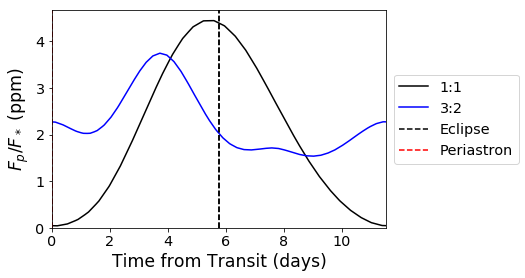

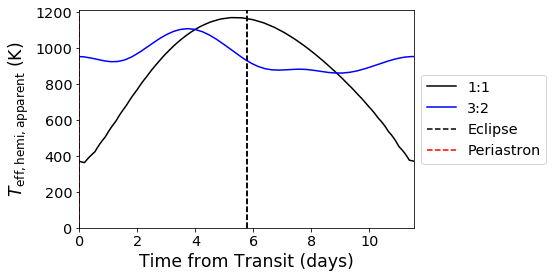

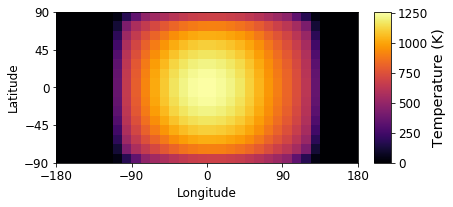

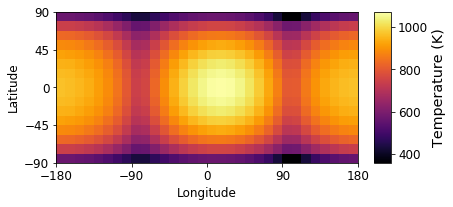

In [6]:
# Plot the lightcurves
fig = system.plot_lightcurve(times, maps, bolo=False)
fig = system2.plot_lightcurve(times2, maps2, bolo=False)
ax = plt.gca()
ax.lines[0].set_color('k')
ax.lines[0].set_label('1:1')
ax.lines[3].set_color('b')
ax.lines[3].set_label('3:2')
handles, labels = np.array(ax.get_legend_handles_labels())
ax.legend(handles[np.array([0,3,4,5])], labels[np.array([0,3,4,5])], loc=6, bbox_to_anchor=(1,0.5), fontsize='x-large')
plt.savefig(savepathroot+name+'/'+name+'_lcs.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Plot the temperature curves
fig = system.plot_tempcurve(times, maps)
fig = system2.plot_tempcurve(times2, maps2)
ax = plt.gca()
ax.lines[0].set_color('k')
ax.lines[0].set_label('1:1')
ax.lines[3].set_color('b')
ax.lines[3].set_label('3:2')
handles, labels = np.array(ax.get_legend_handles_labels())
ax.legend(handles[np.array([0,3,4,5])], labels[np.array([0,3,4,5])], loc=6, bbox_to_anchor=(1,0.5), fontsize='x-large')
plt.savefig(savepathroot+name+'/'+name+'_tcs.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Plot the planets' temperature maps at periastron
index = np.argmin(((times % system.planet.Porb)-system.planet.orbit.get_peri_time())**2)
fig = system.planet.showMap(maps[index], times[index])
plt.savefig(savepathroot+name+'/'+name+'_tmap.pdf', bbox_inches='tight')
plt.show()
plt.close()
index2 = np.argmin(((times2 % system2.planet.Porb)-system2.planet.orbit.get_peri_time())**2)
fig2 = system2.planet.showMap(maps2[index], times2[index])
plt.savefig(savepathroot+name+'/'+name2+'_tmap.pdf', bbox_inches='tight')
plt.show()
plt.close()